In [1]:
import joblib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
rf = joblib.load('../models/rf_model.pkl')
features = joblib.load('../models/rf_features.pkl')
X_test = joblib.load('../models/x_test.pkl')
y_test = joblib.load('../models/y_test.pkl')                 

In [3]:
y_pred = rf.predict(X_test)

In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        69
           1       0.88      0.61      0.72        23

    accuracy                           0.88        92
   macro avg       0.88      0.79      0.82        92
weighted avg       0.88      0.88      0.87        92



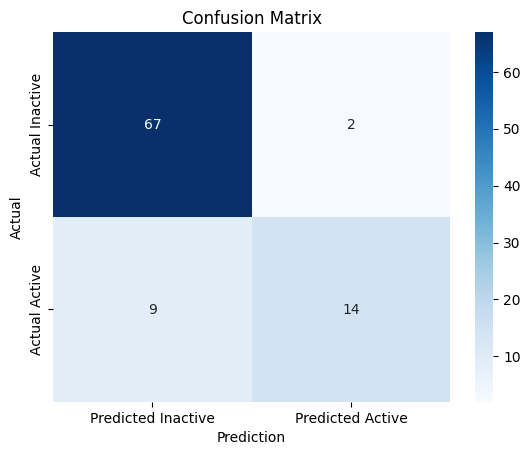

In [5]:
conf = confusion_matrix(y_test, y_pred)

sns.heatmap(conf, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Predicted Inactive', 'Predicted Active'],
            yticklabels = ['Actual Inactive', 'Actual Active'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model carries a precision of 88% for both active and inactive days, indicating that it correctly predicts 88% of these occurrences. The model also has a recall of 61% for active days, which indicates it does not capture active days, precisely, and only 6 out of 10 given days are accurately captured. This is cause for concern in a biometric active/inactive predicting data model, as missing 4 out of 10 actual active days could be unacceptable in certain case scenarios. Model tuning may be needed, along with re-evaluation.

In [12]:
importance = rf.feature_importances_
feature_imp = pd.Series(importance, index = features).sort_values(ascending = True)

feature_imp

SedentaryMinutes        0.084297
Calories                0.092840
LightlyActiveMinutes    0.201893
FairlyActiveMinutes     0.248898
VeryActiveMinutes       0.372072
dtype: float64

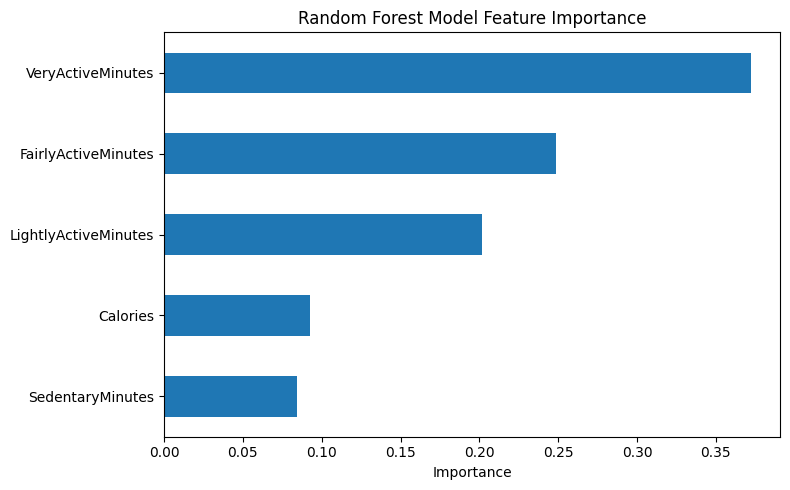

In [7]:
plt.figure(figsize = (8, 5))
feature_imp.plot(kind = 'barh', title = 'Random Forest Model Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

The model is most influenced by 'VeryActiveMinutes', followed by 'FairlyActiveMinutes' and 'LightlyActiveMinutes', in predicting Active days. This is to be expected as the model's target variable is active days versus inactive days.